# 12장 연습문제 (데이터 시각화)

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 1. Matlab을 이용하여 카페의 개수를 나타내는 간단한 막대 그래프(Bar Graph)를 그리는 프로개름을 작성하시오. 단, 막대 그래프의 X축 간격을 3달로 설정한다.

In [12]:
cafedf = pd.read_csv('db/cafe_2years.csv')
cafedf

,기준월,카페수
0,201710,79296
1,201711,80738
2,201712,76923
3,201801,77942
4,201802,84967
5,201803,80719
6,201804,80719
7,201805,87156
8,201806,81248
9,201807,82191


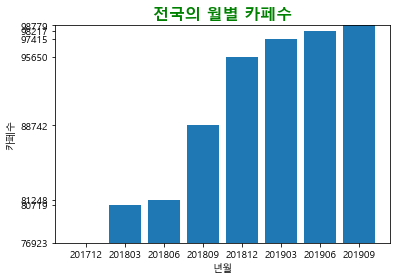

In [163]:
z = np.arange(8)

years = cafedf['기준월']
cafe_count = cafedf['카페수']

x = [years[i] for i in range(len(years)) if i % 3 == 2]
y = [cafe_count[i] for i in range(len(cafe_count)) if i % 3 == 2]

plt.ylim(y[0],y[7])

values = plt.bar(z, y, align='center')
plt.xticks(z, x)
plt.yticks(y, y)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.title('전국의 월별 카페수', fontdict=title_font)

plt.xlabel('년월')
plt.ylabel('카페수')
plt.show()

### 2. CSV 파일을 읽어서 서울과 6개 광역시(부산, 대구, 인천, 대전, 광주, 울산)에 대해 지역, 일반의, 인턴, 레지던트, 전문의 의사 수를 출력하는 프로그램을 작성하시오.

In [171]:
doc_2019 = pd.read_csv('db/doctor_2019.csv')
doc_2019.tail()

,지역,병원명,일반의 수,인턴 수,레지던트 수,전문의 수
350,서울,홍익병원,1,4,14,55
351,강원,홍천아산병원,1,0,0,10
352,경기,효산의료재단 안양샘병원,7,5,17,86
353,경기,효산의료재단 지샘병원,2,0,2,72
354,서울,희명병원,1,0,0,22


In [215]:
t = doc_2019.groupby(doc_2019['지역'])[('일반의 수', '인턴 수', '레지던트 수', '전문의 수')].sum()
t

,일반의 수,인턴 수,레지던트 수,전문의 수
지역,,,,
강원,34,88,309,857
경기,130,458,1836,5471
경남,38,103,315,1473
경북,37,3,45,929
광주,16,102,356,1006
대구,27,215,712,1436
대전,25,142,425,1006
부산,58,197,785,2211
서울,162,1196,4757,9375


In [222]:
doc_list = t.loc[['서울', '부산', '대구', '인천', '대전', '광주', '울산']]
doc_list

,일반의 수,인턴 수,레지던트 수,전문의 수
지역,,,,
서울,162,1196,4757,9375
부산,58,197,785,2211
대구,27,215,712,1436
인천,47,138,444,1518
대전,25,142,425,1006
광주,16,102,356,1006
울산,19,23,104,467


### 3. 2번 문제에서 얻은 결과를 doctor2.csv파일로 저장하는 프로그램을 작성하시오

In [223]:
doc_list.to_csv('dortor2.csv')

### 4. 3번 문제에서 지정한 dortor2.csv파일을 읽어들여 서울 및 6개 광역시의 종합 병원 전문의 의사 수를 산포 그래프 Scatter Plot)로 보여 주는 프로그램을 작성하시오.

In [233]:
doc2 = pd.read_csv('db/doctor2.csv')
doc2

,지역,일반의 수,인턴 수,레지던트 수,전문의 수
0,서울,162,1196,4757,9375
1,부산,58,197,785,2211
2,대구,27,215,712,1436
3,인천,47,138,444,1518
4,대전,25,142,425,1006
5,광주,16,102,356,1006
6,울산,19,23,104,467


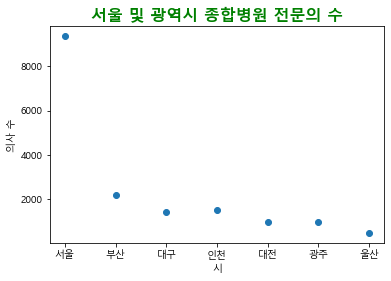

In [290]:
plt.scatter(doc2['지역'], doc2['전문의 수'])
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.xlabel('시')
plt.ylabel('의사 수')
plt.title('서울 및 광역시 종합병원 전문의 수', fontdict=title_font)
plt.show()

### 5. 4번 문제에서 사용한 doctor2.csv 파일을 읽어 서울과 6개 광역시의 종합병원의 일반의, 인턴, 레지던트, 전문의 의사 수를 그래프로 나타내는 프로그램을 작성하시오.

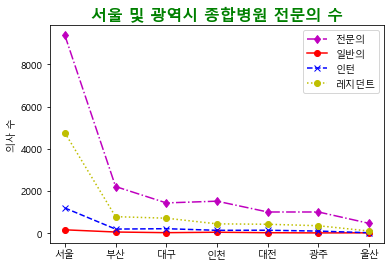

In [288]:
plt.plot(doc2['지역'], doc2['전문의 수'], 'md-.', label="전문의")
plt.plot(doc2['지역'], doc2['일반의 수'], 'ro-', label="일반의")
plt.plot(doc2['지역'], doc2['인턴 수'], 'bx--', label="인턴")
plt.plot(doc2['지역'], doc2['레지던트 수'], 'yo:', label="레지던트")
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.ylabel('의사 수')
plt.title('서울 및 광역시 종합병원 전문의 수', fontdict=title_font)
plt.legend(loc=1)
plt.show()

### 6. 4번 문제에서 사용한 doctor2.csv 파일을 읽어 서울 종합병원의 의수 수 분포를 의사 유형별로 나타내는 파이그래프를 그리는 프로그램을 작성하시오.

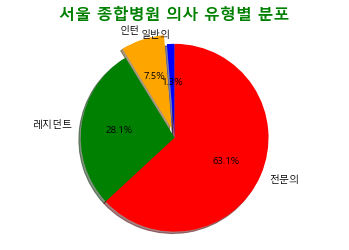

In [279]:
labels = ['일반의', '인턴', '레지던트', '전문의']
sizes = [doc2['일반의 수'].sum(), doc2['인턴 수'].sum(), doc2['레지던트 수'].sum(), doc2['전문의 수'].sum()]
colors = ['blue', 'orange', 'green', 'red']
explode = (0, 0.1, 0, 0)
plt.title("서울 종합병원 의사 유형별 분포")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'green'
}
plt.title('서울 종합병원 의사 유형별 분포', fontdict=title_font)
plt.axis('equal')
plt.show()